In [1]:
# Change Working Directory
import os
os.chdir("../code/")

## Titanic Dataset Pre-processing

In [2]:
import pandas as pd
import numpy as np
from DecisionTree import DecisionTree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [3]:
os.chdir("../")

In [4]:
df = pd.read_csv("./data/test/trainTitanic.csv")
filter_df = df.drop('Name', axis=1)
filter_df = filter_df.drop('Ticket', axis=1)
filter_df = filter_df.drop('Cabin', axis=1)

test_df = filter_df
test_df = test_df[test_df["Age"].notna()]

cols = test_df.columns.tolist()
cols = cols[0:1] + cols[2:] + cols[1:2]

test_df = test_df[cols]

sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'S': 0, 'C': 1}

test_df['Sex'] = test_df['Sex'].map(sex_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

test_df = test_df.dropna()
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,0,22.0,1,0,7.2500,0.0,0
1,2,1,1,38.0,1,0,71.2833,1.0,1
2,3,3,1,26.0,0,0,7.9250,0.0,1
3,4,1,1,35.0,1,0,53.1000,0.0,1
4,5,3,0,35.0,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...,...
883,884,2,0,28.0,0,0,10.5000,0.0,0
884,885,3,0,25.0,0,0,7.0500,0.0,0
886,887,2,0,27.0,0,0,13.0000,0.0,0
887,888,1,1,19.0,0,0,30.0000,0.0,1


In [5]:
videoDF = df.dropna()
videoDF = videoDF.drop('Name', axis=1)
videoDF = videoDF.drop('PassengerId', axis=1)
videoDF = videoDF.drop('Cabin', axis=1)
videoDF = videoDF.drop('Ticket', axis=1)
videoDF = videoDF.sample(frac=1).reset_index(drop=True)
videoDF

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,male,28.0,0,0,35.5000,S
1,1,1,male,80.0,0,0,30.0000,S
2,1,1,female,51.0,1,0,77.9583,S
3,1,2,female,23.0,0,0,13.7917,C
4,0,1,male,30.0,0,0,27.7500,C
...,...,...,...,...,...,...,...,...
178,1,1,female,36.0,1,2,120.0000,S
179,1,1,male,17.0,0,2,110.8833,C
180,0,1,male,29.0,0,0,30.0000,S
181,0,3,female,29.0,1,1,10.4625,S


In [6]:
videoDF = videoDF.sample(frac=1)
videoDF

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
178,1,1,female,36.0,1,2,120.0000,S
52,1,1,male,25.0,1,0,91.0792,C
125,0,2,male,36.0,0,0,12.8750,C
33,1,1,male,27.0,1,0,53.1000,S
29,1,1,female,14.0,1,2,120.0000,S
...,...,...,...,...,...,...,...,...
128,1,2,female,36.0,0,0,13.0000,S
167,1,2,male,1.0,2,1,39.0000,S
22,1,2,male,3.0,1,1,26.0000,S
134,0,1,female,2.0,1,2,151.5500,S


In [7]:
new_videDF = videoDF.iloc[[0, 1, 179, 2, 180, 181]]  # Select rows 2 and 4
new_videDF["Survived?"] = new_videDF["Survived"]  # Create new column
new_videDF = new_videDF.drop('Survived', axis=1)  # Drop old column

new_videDF = new_videDF.sample(frac=1).reset_index(drop=True)
new_videDF


/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_53476/1165285013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_videDF["Survived?"] = new_videDF["Survived"]  # Create new column


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived?
0,1,female,36.0,1,2,120.0000,S,1
1,2,male,3.0,1,1,26.0000,S,1
2,1,male,25.0,1,0,91.0792,C,1
3,1,female,2.0,1,2,151.5500,S,0
4,2,male,36.0,0,0,12.8750,C,0
5,2,male,1.0,2,1,39.0000,S,1


In [8]:
data_np = test_df.to_numpy(dtype=object)[:, 1:]
data_np

array([[3, 0, 22.0, ..., 7.25, 0.0, 0],
       [1, 1, 38.0, ..., 71.2833, 1.0, 1],
       [3, 1, 26.0, ..., 7.925, 0.0, 1],
       ...,
       [2, 0, 27.0, ..., 13.0, 0.0, 0],
       [1, 1, 19.0, ..., 30.0, 0.0, 1],
       [1, 0, 26.0, ..., 30.0, 1.0, 1]], dtype=object)

In [9]:
data_np.shape

(684, 8)

## My Implementation

In [10]:
test1 = DecisionTree.DecisionTree(max_depth=5)
test1.build_tree(data=data_np)

In [11]:
test1.print_tree()

Feature 1 < 0.5
Left:
  Feature 2 < 9.5
  Left:
    Feature 3 < 2.5
    Left:
      Leaf: 1
    Right:
      Feature 2 < 3.5
      Left:
        Feature 2 < 2.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
      Right:
        Leaf: 0
  Right:
    Feature 0 < 1.5
    Left:
      Feature 2 < 53.0
      Left:
        Feature 5 < 25.9375
        Left:
          Leaf: 0
        Right:
          Leaf: 0
      Right:
        Feature 2 < 75.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
    Right:
      Feature 5 < 51.697900000000004
      Left:
        Feature 5 < 19.5
        Left:
          Leaf: 0
        Right:
          Leaf: 0
      Right:
        Feature 0 < 2.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
Right:
  Feature 0 < 2.5
  Left:
    Feature 2 < 2.5
    Left:
      Feature 0 < 1.5
      Left:
        Leaf: 0
      Right:
        Leaf: 1
    Right:
      Feature 5 < 28.85625
      Left:
        Feature 5 < 28.23125
  

## XGBoost for the video

In [12]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,0,22.0,1,0,7.2500,0.0,0
1,2,1,1,38.0,1,0,71.2833,1.0,1
2,3,3,1,26.0,0,0,7.9250,0.0,1
3,4,1,1,35.0,1,0,53.1000,0.0,1
4,5,3,0,35.0,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...,...
883,884,2,0,28.0,0,0,10.5000,0.0,0
884,885,3,0,25.0,0,0,7.0500,0.0,0
886,887,2,0,27.0,0,0,13.0000,0.0,0
887,888,1,1,19.0,0,0,30.0000,0.0,1


In [13]:
test_df[test_df["Survived"] == 1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,2,1,1,38.0,1,0,71.2833,1.0,1
2,3,3,1,26.0,0,0,7.9250,0.0,1
3,4,1,1,35.0,1,0,53.1000,0.0,1
8,9,3,1,27.0,0,2,11.1333,0.0,1
9,10,2,1,14.0,1,0,30.0708,1.0,1
...,...,...,...,...,...,...,...,...,...
875,876,3,1,15.0,0,0,7.2250,1.0,1
879,880,1,1,56.0,0,1,83.1583,1.0,1
880,881,2,1,25.0,0,1,26.0000,0.0,1
887,888,1,1,19.0,0,0,30.0000,0.0,1


In [14]:
list(test_df.columns)

['PassengerId',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Survived']

In [15]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
y_pred = data_np[:,7:8]
mapper = np.vectorize(lambda x: 0 if x == 0 else 1)
y_pred_mapped = mapper(y_pred)

In [17]:
data_np[:,:7]

array([[3, 0, 22.0, ..., 0, 7.25, 0.0],
       [1, 1, 38.0, ..., 0, 71.2833, 1.0],
       [3, 1, 26.0, ..., 0, 7.925, 0.0],
       ...,
       [2, 0, 27.0, ..., 0, 13.0, 0.0],
       [1, 1, 19.0, ..., 0, 30.0, 0.0],
       [1, 0, 26.0, ..., 0, 30.0, 1.0]], dtype=object)

In [18]:
y_pred_mapped

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [19]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(data_np[:,:7], y_pred_mapped)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


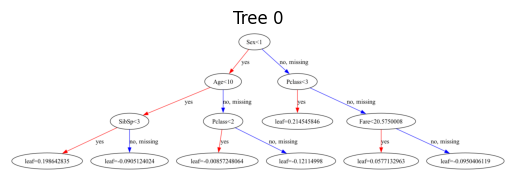

/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


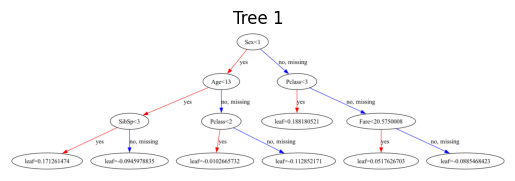

/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


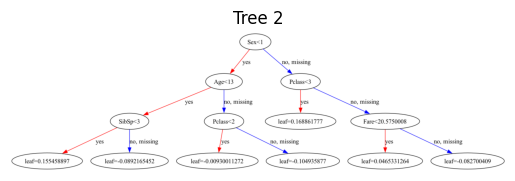

In [20]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Load your trained model (or train one)
# model = xgb.XGBClassifier().fit(X_train, y_train)

booster = model.get_booster()
booster.feature_names = list(test_df.columns)[1:8]

num_trees = booster.best_iteration + 1 if hasattr(booster, "best_iteration") else booster.num_boosted_rounds()
for i in range(num_trees):
    xgb.plot_tree(booster, num_trees=i)
    plt.title(f"Tree {i}")
    plt.show()
    
    if i == 2:
        break


In [21]:
import os
import xgboost as xgb
import matplotlib.pyplot as plt

# Create an output folder
output_dir = "./images/xgboost2/"
os.makedirs(output_dir, exist_ok=True)

# Get booster & set feature names
booster = model.get_booster()
booster.feature_names = list(test_df.columns)[1:8]

# Determine number of trees to export
num_trees = booster.best_iteration + 1 if hasattr(booster, "best_iteration") else booster.num_boosted_rounds()
num_trees = min(num_trees, 100)  # Limit to first 20 trees

# Loop through trees and save images
for i in range(num_trees):
    fig, ax = plt.subplots(figsize=(20, 10))  # Bigger figure for better quality
    xgb.plot_tree(booster, num_trees=i, ax=ax)
    plt.title(f"Tree {i}")
    plt.savefig(f"{output_dir}/tree_{i}.png", dpi=500, bbox_inches='tight')  # High DPI
    plt.close(fig)  # Close to save memory


/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(
/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(
/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(
/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(
/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(
/opt/homebrew/anaconda3/envs/tennisAI/lib/python3.

## Sklearn Implementation

In [22]:
y_pred = data_np[:,7:8]
mapper = np.vectorize(lambda x: "No" if x == 0 else "Yes")
y_pred_mapped = mapper(y_pred)
y_pred_mapped

array([['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],

In [23]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(data_np[:,:7], y_pred_mapped)

In [24]:
from sklearn import tree
text_representation = tree.export_text(clf, feature_names=test_df.columns[1:8])
print(text_representation)

|--- Sex <= 0.50
|   |--- Age <= 9.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: Yes
|   |   |--- SibSp >  2.50
|   |   |   |--- Age <= 3.50
|   |   |   |   |--- Age <= 2.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- Age >  2.50
|   |   |   |   |   |--- class: Yes
|   |   |   |--- Age >  3.50
|   |   |   |   |--- class: No
|   |--- Age >  9.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- Age <= 53.00
|   |   |   |   |--- Fare <= 25.94
|   |   |   |   |   |--- class: No
|   |   |   |   |--- Fare >  25.94
|   |   |   |   |   |--- class: No
|   |   |   |--- Age >  53.00
|   |   |   |   |--- Age <= 75.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- Age >  75.50
|   |   |   |   |   |--- class: Yes
|   |   |--- Pclass >  1.50
|   |   |   |--- Fare <= 51.70
|   |   |   |   |--- Fare <= 19.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- Fare >  19.50
|   |   |   |   |   |--- class: No
|   |   |   |--- Fare >  51.70
|   |   |   |   |--- Fare <= 65.00
|

## Comparison

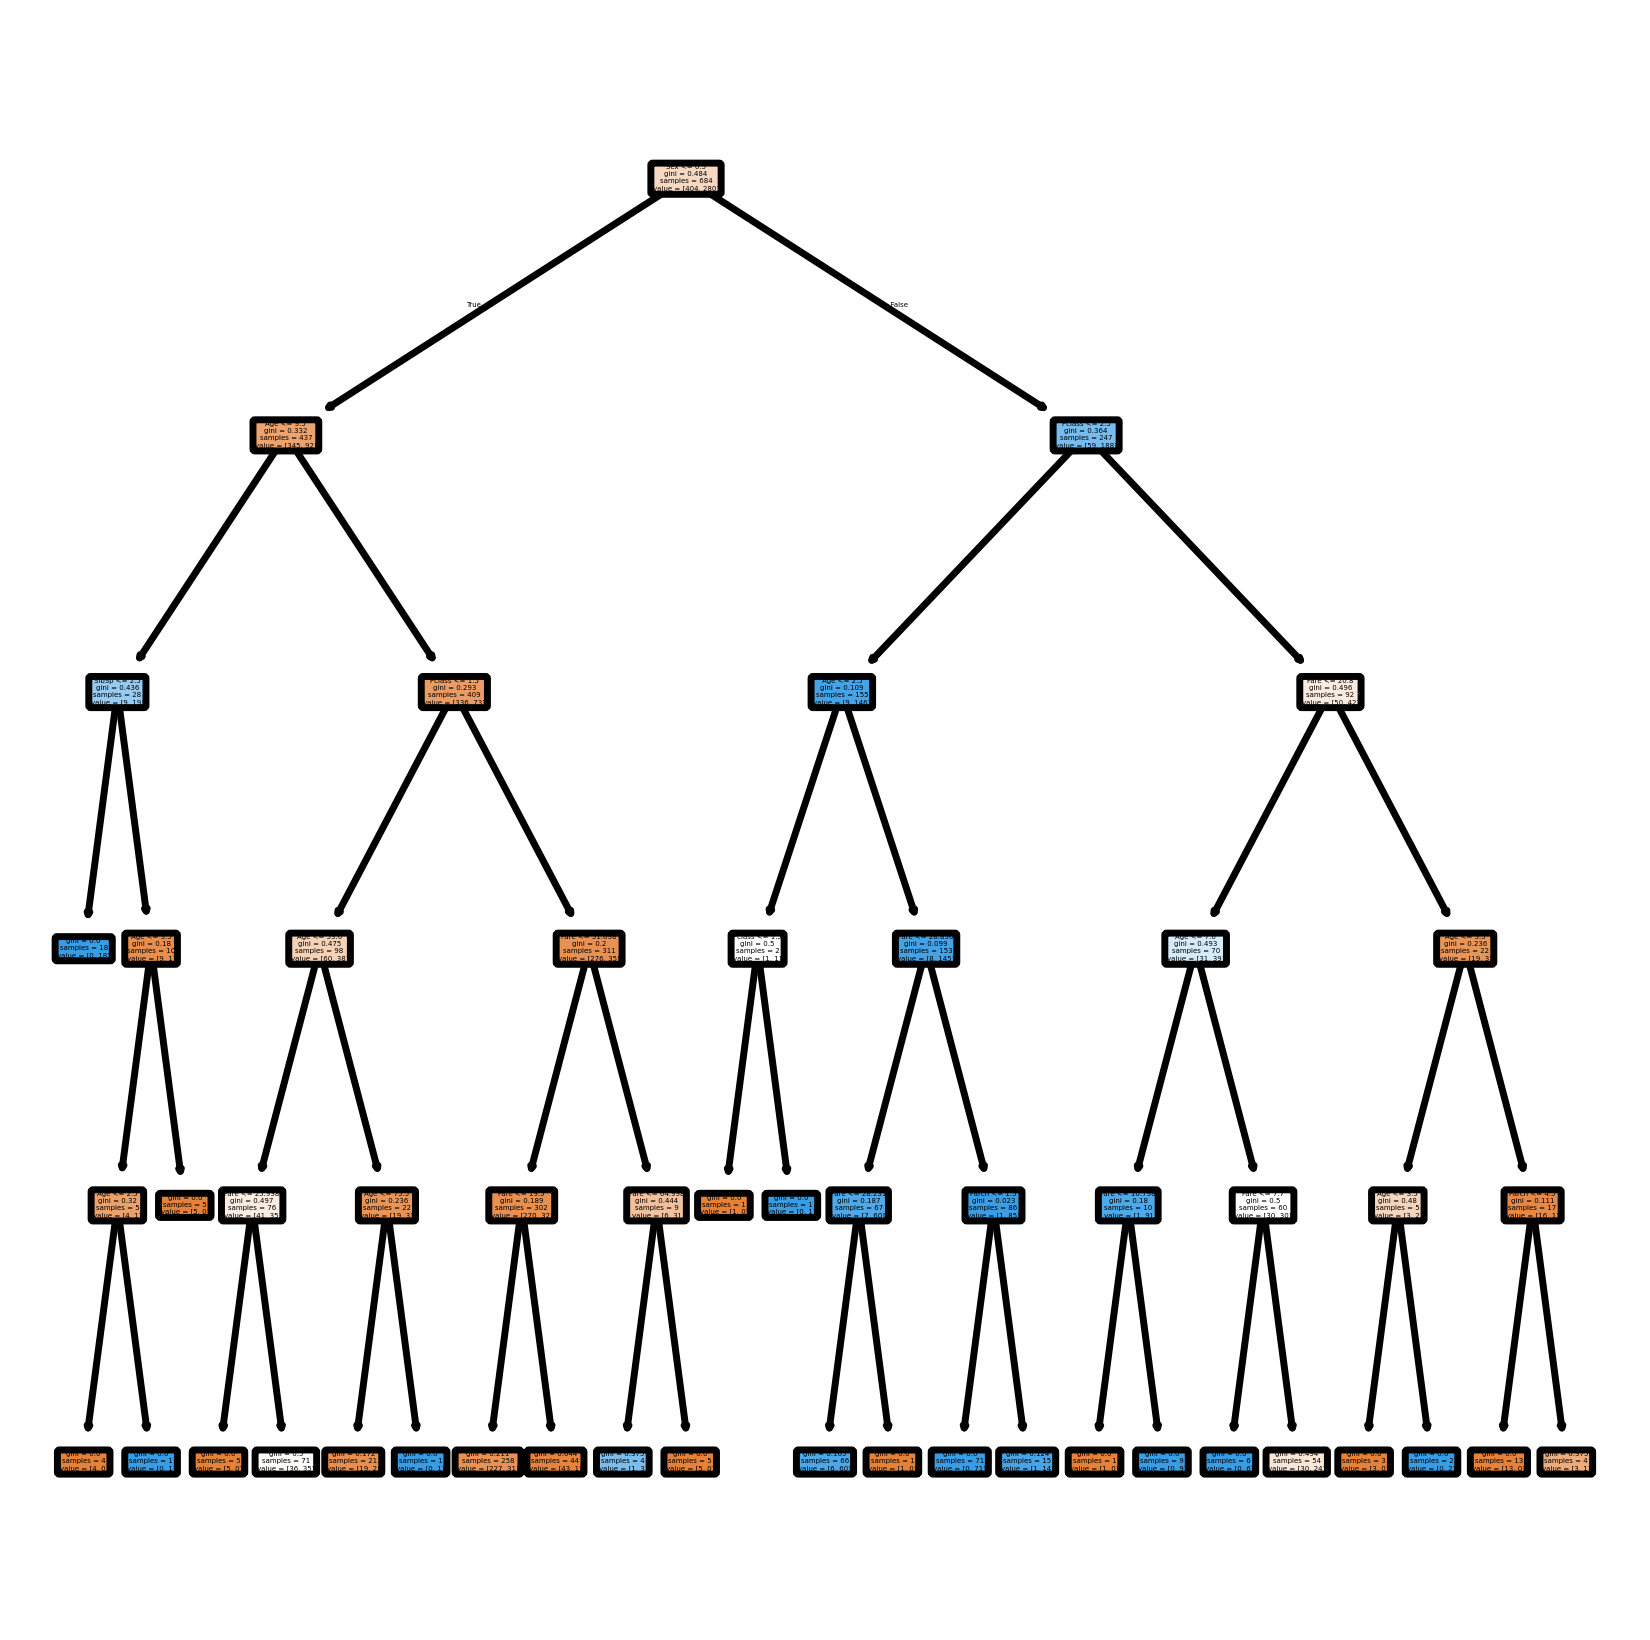

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
plot_tree(clf,filled=True,rounded=True, ax=axes, feature_names=test_df.columns[1:8])
plt.savefig('./images/tree.png', format='png', dpi=1200)

In [26]:
test1.print_tree()

Feature 1 < 0.5
Left:
  Feature 2 < 9.5
  Left:
    Feature 3 < 2.5
    Left:
      Leaf: 1
    Right:
      Feature 2 < 3.5
      Left:
        Feature 2 < 2.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
      Right:
        Leaf: 0
  Right:
    Feature 0 < 1.5
    Left:
      Feature 2 < 53.0
      Left:
        Feature 5 < 25.9375
        Left:
          Leaf: 0
        Right:
          Leaf: 0
      Right:
        Feature 2 < 75.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
    Right:
      Feature 5 < 51.697900000000004
      Left:
        Feature 5 < 19.5
        Left:
          Leaf: 0
        Right:
          Leaf: 0
      Right:
        Feature 0 < 2.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
Right:
  Feature 0 < 2.5
  Left:
    Feature 2 < 2.5
    Left:
      Feature 0 < 1.5
      Left:
        Leaf: 0
      Right:
        Leaf: 1
    Right:
      Feature 5 < 28.85625
      Left:
        Feature 5 < 28.23125
  

My implementation is working on Titanic Dataset as well :)

## Testing Prediction

In [27]:
data_np

array([[3, 0, 22.0, ..., 7.25, 0.0, 0],
       [1, 1, 38.0, ..., 71.2833, 1.0, 1],
       [3, 1, 26.0, ..., 7.925, 0.0, 1],
       ...,
       [2, 0, 27.0, ..., 13.0, 0.0, 0],
       [1, 1, 19.0, ..., 30.0, 0.0, 1],
       [1, 0, 26.0, ..., 30.0, 1.0, 1]], dtype=object)

In [28]:
data_to_predict = data_np[:15,:7]
data_to_predict

array([[3, 0, 22.0, 1, 0, 7.25, 0.0],
       [1, 1, 38.0, 1, 0, 71.2833, 1.0],
       [3, 1, 26.0, 0, 0, 7.925, 0.0],
       [1, 1, 35.0, 1, 0, 53.1, 0.0],
       [3, 0, 35.0, 0, 0, 8.05, 0.0],
       [1, 0, 54.0, 0, 0, 51.8625, 0.0],
       [3, 0, 2.0, 3, 1, 21.075, 0.0],
       [3, 1, 27.0, 0, 2, 11.1333, 0.0],
       [2, 1, 14.0, 1, 0, 30.0708, 1.0],
       [3, 1, 4.0, 1, 1, 16.7, 0.0],
       [1, 1, 58.0, 0, 0, 26.55, 0.0],
       [3, 0, 20.0, 0, 0, 8.05, 0.0],
       [3, 0, 39.0, 1, 5, 31.275, 0.0],
       [3, 1, 14.0, 0, 0, 7.8542, 0.0],
       [2, 1, 55.0, 0, 0, 16.0, 0.0]], dtype=object)

Okay, let's predict with my implementation

In [29]:
test1.predict(data_to_predict)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

Let's try to predict with the Sklearn tree

In [30]:
predictions = clf.predict(data_to_predict)
predictions

array(['No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes'], dtype='<U3')

### Calculate Accuracy on Training Set

In [31]:
test1.calculate_accuracy(data_np)

np.float64(0.8508771929824561)

In [32]:
predictions_all = clf.predict(data_np[:,:7])
predictions_all

array(['No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Y

In [33]:
accuracy_score(y_pred_mapped, predictions_all)

0.8508771929824561

Don't know why mine is 0.8508771929824561 and sklearn is 0.8494152046783626, but that's close enough for me.

## Regularization

Some ideas for the regularization are:

- Limiting Max_Depth - Done ✅
- Minimum Number of Samples to Split - Done ✅
- Minimum Impurity Decrease - Done ✅
- Stop fit when 75% of samples or of one type - Maybe implement in the future
- Limiting the number of total leaves - (end it up not implementig this cause it's pretty much the same as max_depth)

In [34]:
# Example sklearn
tree_clf_example = DecisionTreeClassifier(
    max_depth=10, 
    min_samples_split=20,
    ccp_alpha=0.01,
    random_state=42
)

Let's add some regularization and see if accuracy on the training set decreases (it should)

In [35]:
tree_reg = DecisionTree.DecisionTree(
    max_depth=5,
    min_samples_split = 400,
)
tree_reg.build_tree(data=data_np)

tree_reg.calculate_accuracy(data_np)

np.float64(0.793859649122807)

In [36]:
tree_reg.print_tree()

Feature 1 < 0.5
Left:
  Feature 2 < 9.5
  Left:
    Leaf: 1
  Right:
    Feature 0 < 1.5
    Left:
      Leaf: 0
    Right:
      Leaf: 0
Right:
  Leaf: 1


Another test now with min_gini_change

In [37]:
tree_reg2 = DecisionTree.DecisionTree(
    max_depth=5,
    min_gini_change = 0.05,
)
tree_reg2.build_tree(data=data_np)

In [38]:
tree_reg2.calculate_accuracy(data_np)

np.float64(0.8070175438596491)

In [39]:
tree_reg2.print_tree()

Feature 1 < 0.5
Left:
  Leaf: 0
Right:
  Feature 0 < 2.5
  Left:
    Feature 2 < 2.5
    Left:
      Feature 0 < 1.5
      Left:
        Leaf: 0
      Right:
        Leaf: 1
    Right:
      Leaf: 1
  Right:
    Feature 5 < 20.799999999999997
    Left:
      Leaf: 1
    Right:
      Feature 2 < 5.5
      Left:
        Feature 2 < 3.5
        Left:
          Leaf: 0
        Right:
          Leaf: 1
      Right:
        Feature 4 < 4.5
        Left:
          Leaf: 0
        Right:
          Leaf: 0
